# Import pandas Libraries to read data set

In [5]:
import pandas as pd

# Load Data Set

In [7]:
real_estate_data = pd.read_csv('/content/Real_Estate.csv')
# Displaying first five rows from the real_estate_data dataset
show_first_five_rows = real_estate_data.head()
print("Data Head:::\n",show_first_five_rows)
#display information of dataset
data_info = real_estate_data.info()
print("Data Info:::\n",data_info)

Data Head:::
              Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  
0                  6.488673  
1                 24.970725  
2                 26.694267  
3                 38.091638  


# Checking For Null Values

In [8]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

#Printing Descriptive Statistics

In [9]:
print("Descriptive Statistics::\n", real_estate_data.describe())

Descriptive Statistics::
         House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%       

# Histograms of all Numeric Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

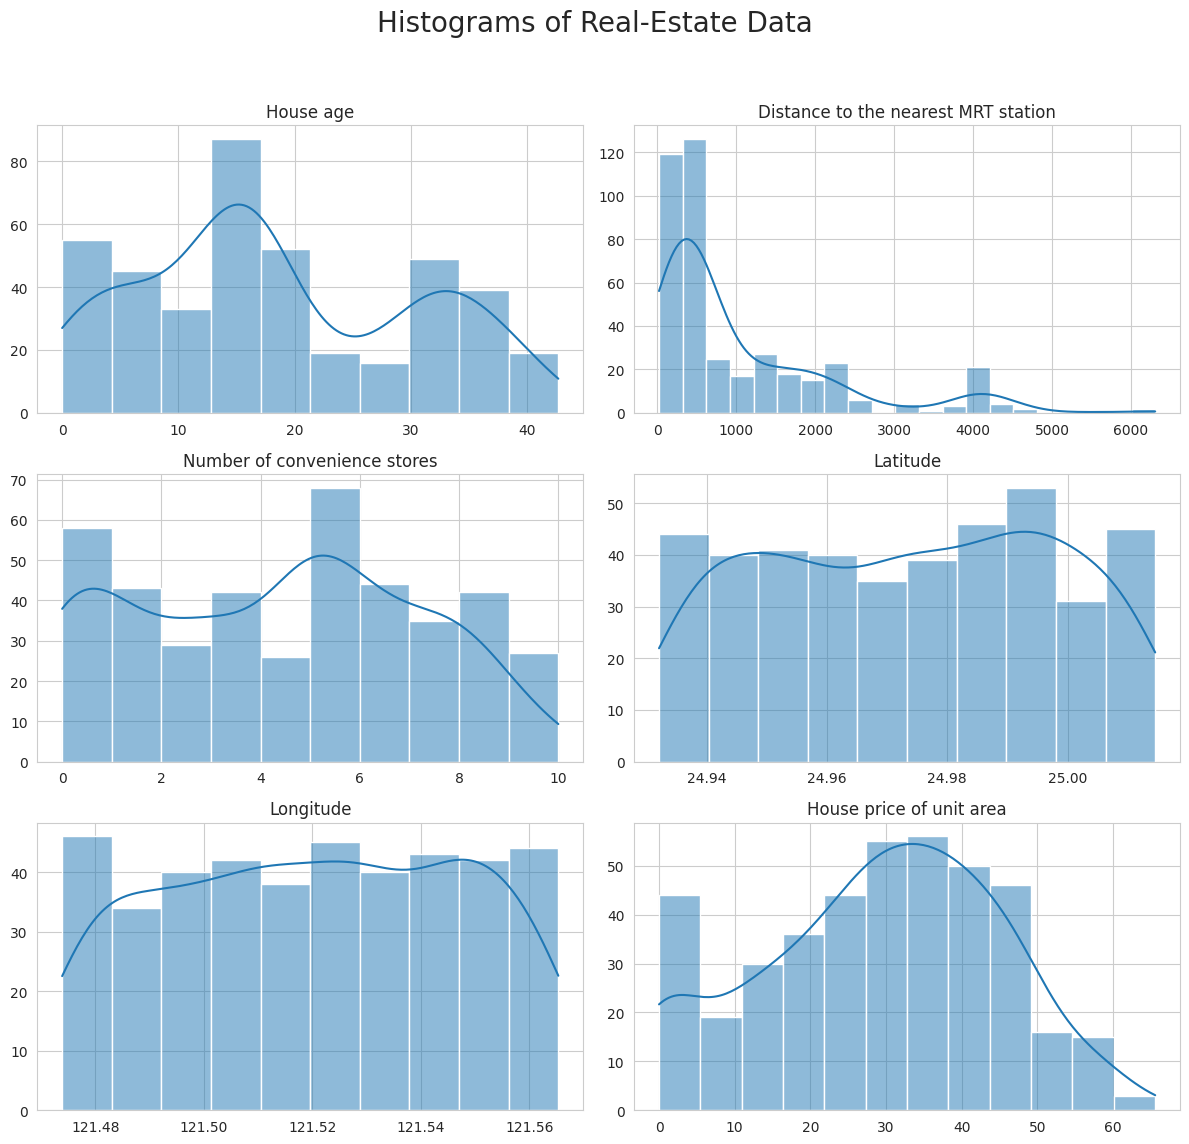

In [15]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle('Histograms of Real-Estate Data', fontsize=20)
cols =['House age','Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area']
for i, col in enumerate(cols):
  sns.histplot(data=real_estate_data[col], kde=True, ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(col)
  axes[i//2, i%2].set_xlabel('')
  axes[i//2, i%2].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

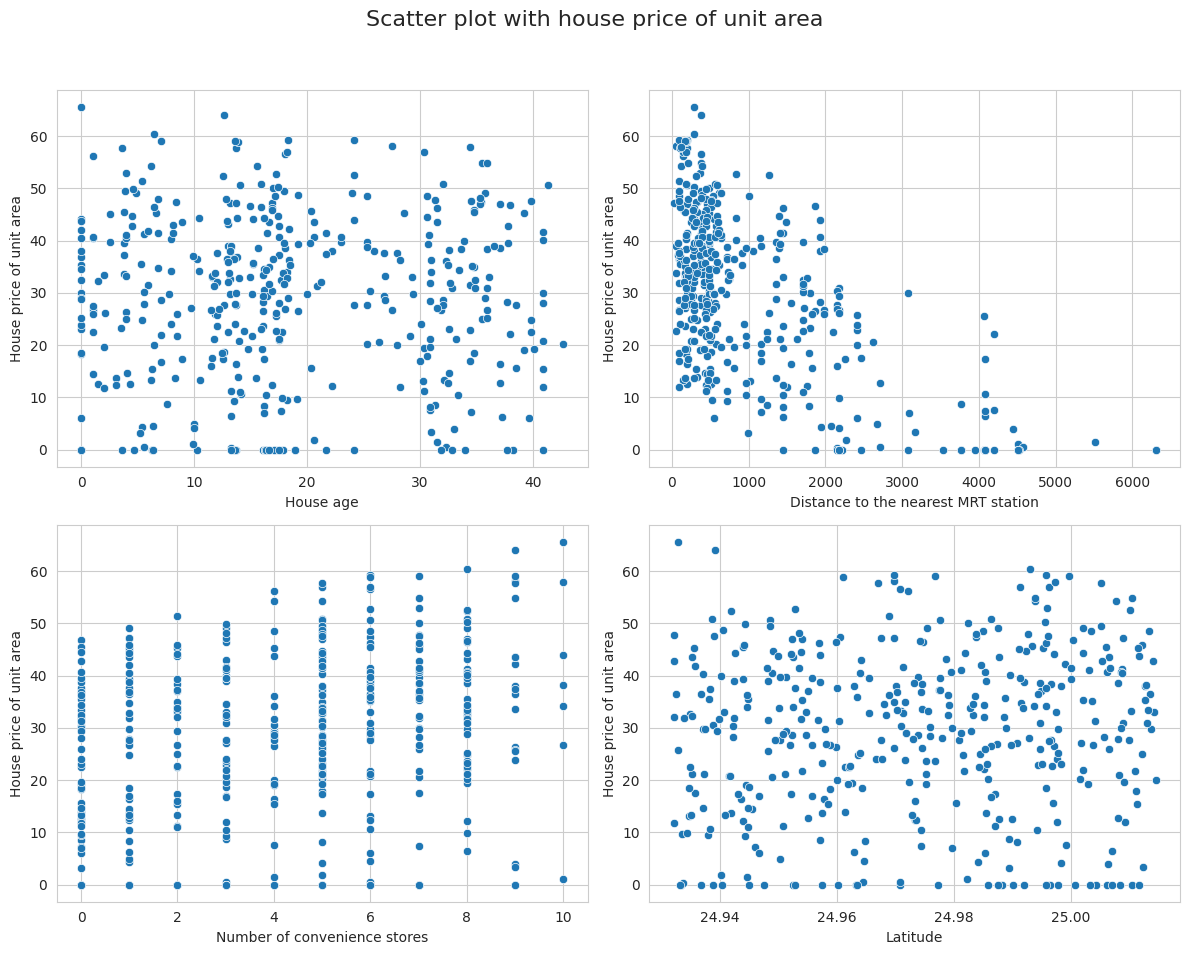

In [14]:
#scatter plots to observe with relationship with house price
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Scatter plot with house price of unit area', fontsize=16)
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0,0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0,1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1,0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1,1])
plt.tight_layout(rect=[0.0,0.03,1, 0.95])
plt.show()

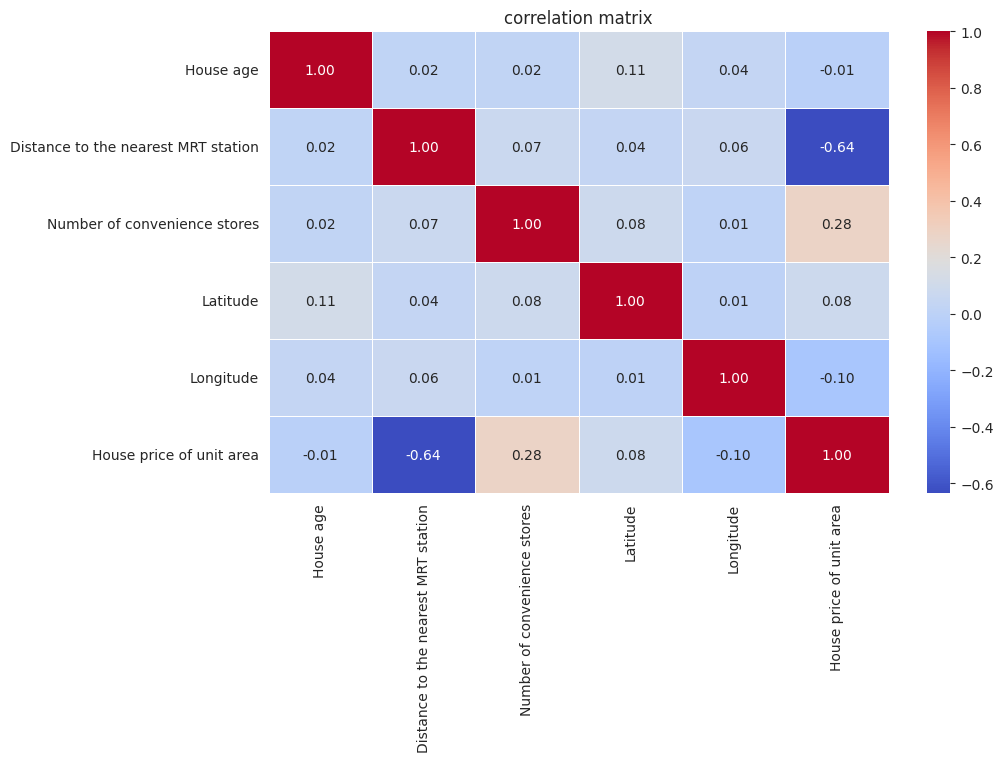

correlation:
                                      House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age              

In [18]:
#Correlation
correlation_matrix = real_estate_data.drop('Transaction date', axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt="0.2f", linewidths=0.5)
plt.title('correlation matrix')
plt.show()
print('correlation:\n', correlation_matrix)

In [20]:
#lets build a regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
features = ['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']
target = 'House price of unit area'
x=real_estate_data[features]
y = real_estate_data[target]
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#creating model instance
model = LinearRegression()
#fitting the model
model.fit(x_train, y_train)


LinearRegression()

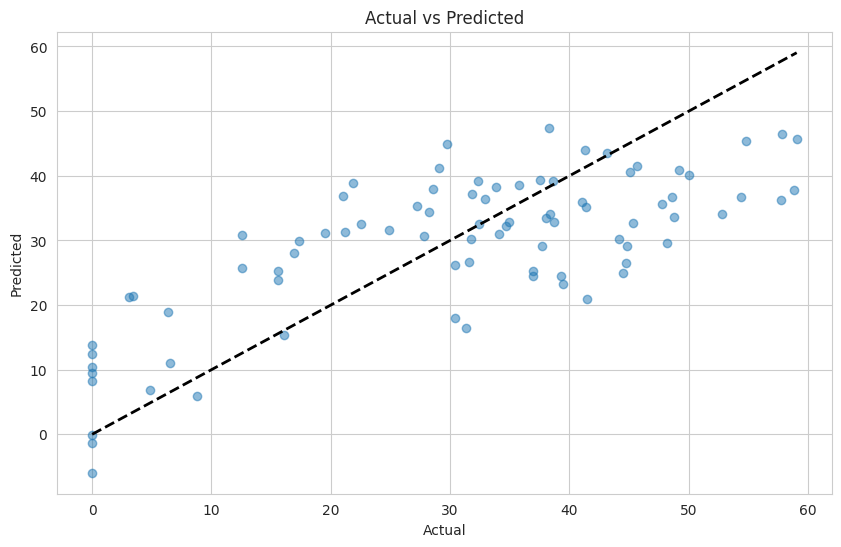

In [22]:
#making predictions
y_pred = model.predict(x_test)
#visualizing Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()],'k--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()